<a href="https://colab.research.google.com/github/Sneyderbg/telco_churn_ml/blob/main/exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga y carga del dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dimensiones, estadísticas y tipos

In [ ]:
# Número de muestras y variables
print("Número de muestras:", df.shape[0])
print("Número de variables:", df.shape[1])

# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(df.isnull().sum())

# Tipos de datos de cada variable
print("\nTipos de datos por columna:")
print(df.dtypes)

Número de muestras: 7043
Número de variables: 21

Datos faltantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tipos de datos por columna:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      obje

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Mostrar estadísticas descriptivas para las variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
display(df[numeric_cols].describe())

Estadísticas descriptivas de variables numéricas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Variable objetivo

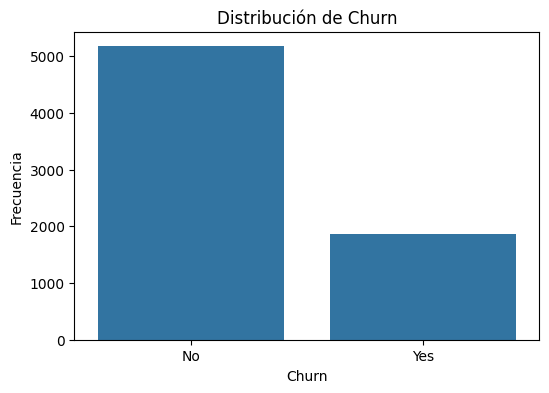

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de conteo para la variable Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Variables categoricas

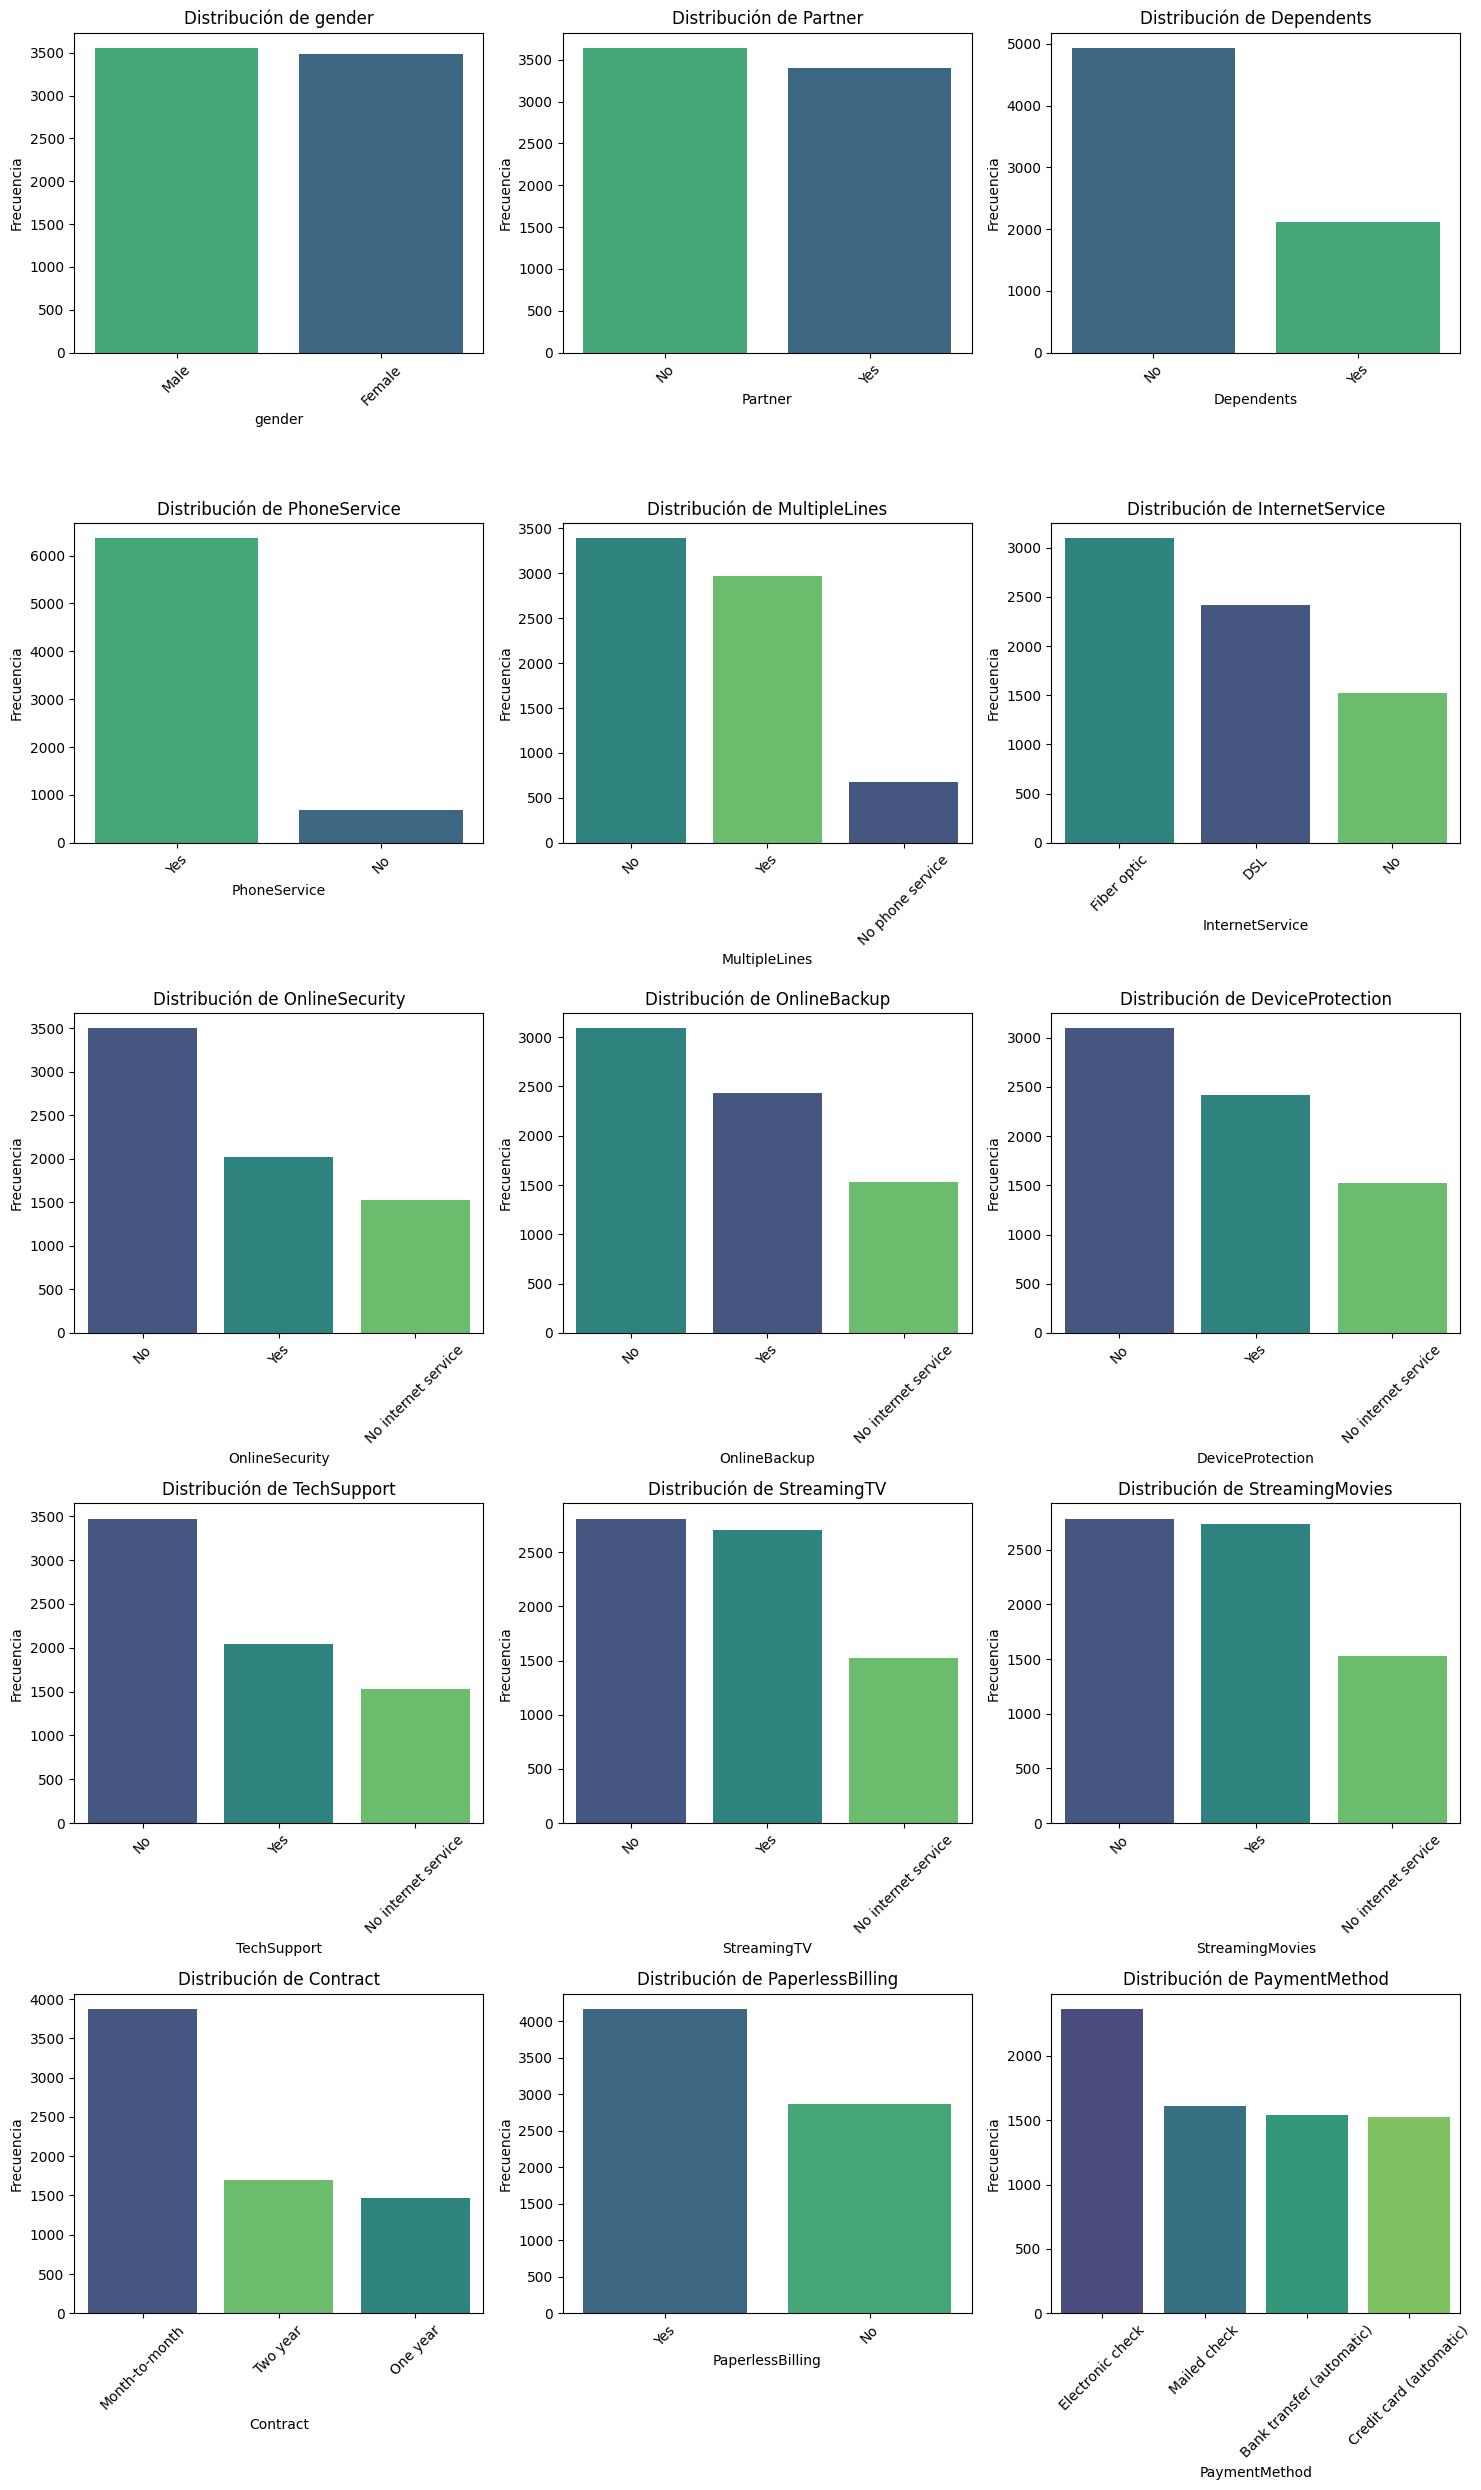

In [ ]:
# Código de la celda 79b651a6
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seleccionar columnas categóricas (excluyendo customerID si no es relevante para la distribución)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID') # customerID is likely just an identifier
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # Churn is the target variable, will be visualized separately
if 'TotalCharges' in categorical_cols: # Exclude TotalCharges as it was converted to numeric
    categorical_cols.remove('TotalCharges')


# Calcular el número de filas y columnas para la cuadrícula
n_cols = 3  # Puedes ajustar el número de columnas según prefieras
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Crear gráficos de barras para las columnas categóricas en la cuadrícula
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', ax=axes[i], hue=col, legend=False) # Addressed FutureWarning
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45, labelrotation=45) # Corrected keyword to labelrotation


# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Columna 'TotalCharges'

Esta columna se trata de manera especial ya que la mayoría de sus datos son numericos, solo hay uno el cual es un string vacío. En la siguiente sección se transforman sus datos a numericos reemplazando este string vacío por un 0 solo con el fin de visualizar los demás valores.

In [ ]:
# Buscar valores no numericos en "TotalCharges"
non_numeric_totalcharges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges'].unique()

print("Non-numeric values in 'TotalCharges':", non_numeric_totalcharges)

Non-numeric values in 'TotalCharges': [' ']


In [ ]:
# Comprobar si las demás columnas tienen al menos un valor convertible a numerico,
# y si es el caso buscar los valores únicos no numéricos
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if pd.to_numeric(df[col], errors='coerce').notna().any():
        print(f"La columna '{col}' tiene valores numericos y sus no numericos son:")
        print(df[pd.to_numeric(df[col], errors='coerce').isna()][col].unique())

La columna 'TotalCharges' tiene valores numericos y sus no numericos son:
[' ']


In [ ]:
# Filas con la columna "TotalCharges" vacía
df[df["TotalCharges"] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Variables numericas

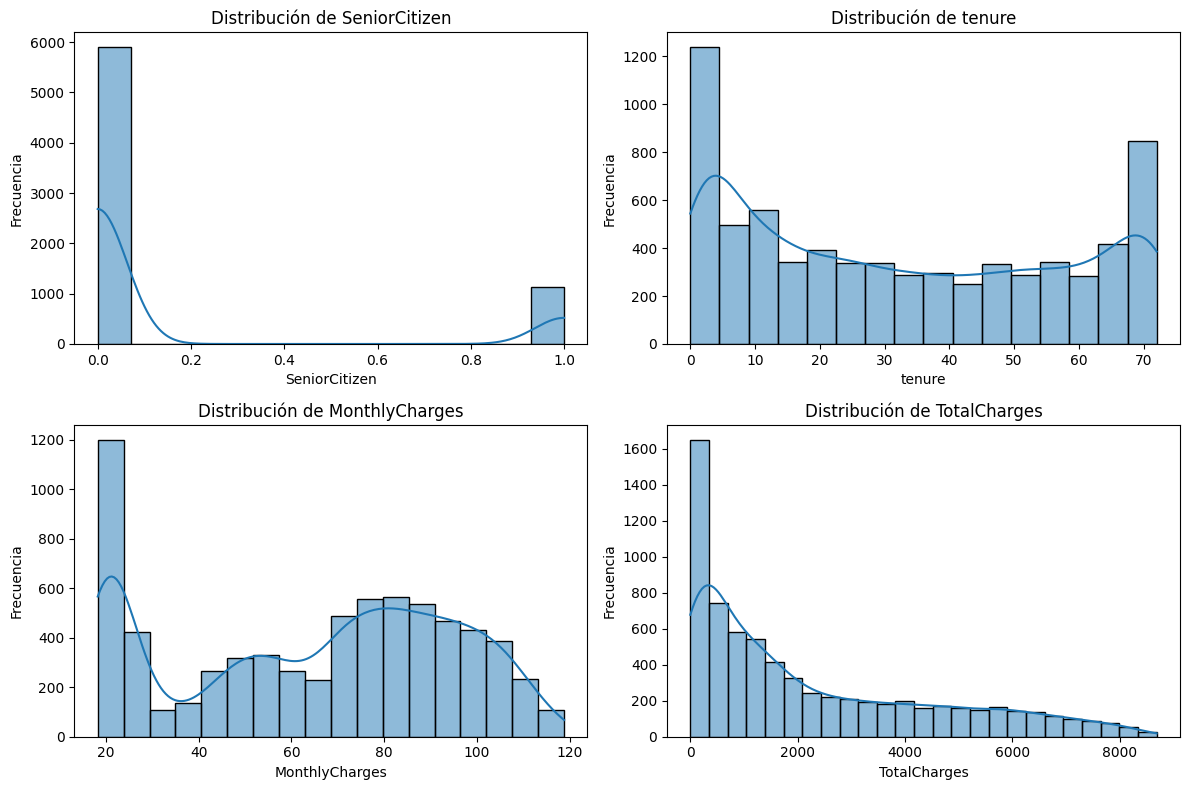

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Reemplazar ' ' con 0 en 'TotalCharges' y convertir a numérico
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el número de filas y columnas para la cuadrícula
n_cols = 2  # Puedes ajustar el número de columnas según prefieras
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten() # Aplanar la matriz de ejes para facilitar la iteración

# Crear histogramas para las columnas numéricas en la cuadrícula
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()